In [111]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt 

%matplotlib inline
from scipy import stats
from statsmodels.graphics.api import qqplot

# Introduccion

Hemos estudiado series temporales que no exhibieron un crecimiento a largo plazo, es decir no tienen una media constante. Sin embargo, muchas series de tiempo económicas y financieras no tienen una media constante. Los ejemplos incluyen: el PIB y el IPC de Ecuador.

Los modelos ARIMA no estacionarios incluyen la "caminata aleatoria" y la "caminata aleatoria con deriva". Modelos univariados simples como estos han demostrado ser herramientas de pronóstico muy poderosas. 

# Diferenciacion

La diferenciacon de una serie es un concepto similar al de la derivada. Basicamente, la diferenciacion es el cambio de una serie de un periodo a otro $\Delta x_t= x_t-x_{t-1}$

Si una seria necesita ser diferenciada para convertirla en estacionaria, decimos que la series es integrada de orden 1, $I(1)$. Si una serie necesita ser diferenciada dos veces para ser estacionaria, decimos que es integrada de orden 2, $I(2)$

Si una serie temporal X crece, no es estacionaria. Si su primera diferencia es estacionaria, entonces decimos que está "integrada". La diferenciación no elimina todas las no estacionarias; solo elimina la no estacionariedad asociada con la integración.

Podemos construir fácilmente en el marco ARMA (p, q) que utilizamos para los procesos estacionarios para incluir variables I (d). Los dos se pueden combinar para hacer modelos ARIMA (p, d, q). Realmente, hay pocas novedades aquí con respecto a la estimación. Simplemente necesitamos averiguar si diferenciar una variable un pequeño número de veces hace que una variable sea estacionaria. Luego procedemos con la parte ARMA (p, q) del análisis.
A continuación, exploraremos cómo la diferenciación afecta tres procesos no estacionarios diferentes: una caminata aleatoria, una caminata aleatoria con deriva y un modelo de tendencia determinista. Veremos que la dificultad radica en determinar si la variable es estacionaria después de las diferencias "d". Las diferencias erróneas se suman a nuestros problemas, por lo que no es una solución automática y gratuita.

# Caminata aleatoria (random walk)

Consideramos el modelo $y_t = y_{t-1}+e_t$

## Generando una caminata aleatoria

In [189]:
arparams = np.array([1, -1])
maparams = np.array([1])

nobs = 240

y = arma_generate_sample(arparams, maparams, nobs)

In [190]:
y=pd.DataFrame(y, columns=['y'])
y.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

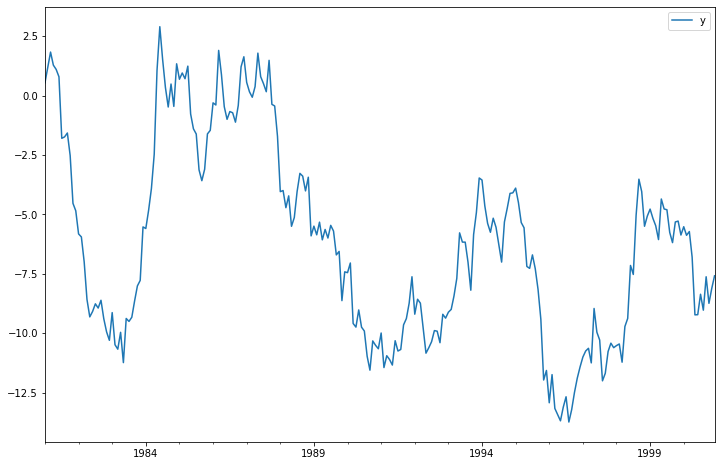

In [191]:
y.plot(figsize=(12,8))

## Grafico de ACF y PACF

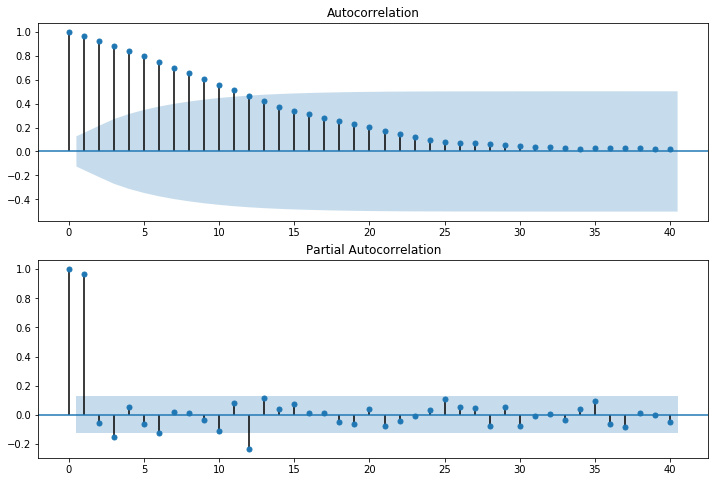

In [192]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

## Estimacion del modelo

In [193]:
# Generar el modelo
model = sm.tsa.SARIMAX(y, order=(1,0,0), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -342.639
Date:                Tue, 23 Jun 2020   AIC                            689.278
Time:                        15:32:30   BIC                            696.240
Sample:                    01-31-1981   HQIC                           692.083
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9895      0.009    113.910      0.000       0.972       1.006
sigma2         1.0013      0.081     12.364      0.000       0.843       1.160
Ljung-Box (Q):                       54.86   Jarque-

## Analisis de los residuos

In [194]:
resid = results.resid

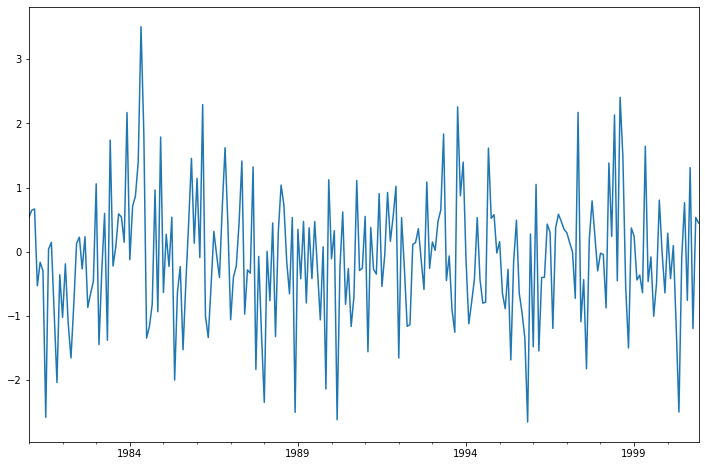

In [195]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax = resid.plot(ax=ax)

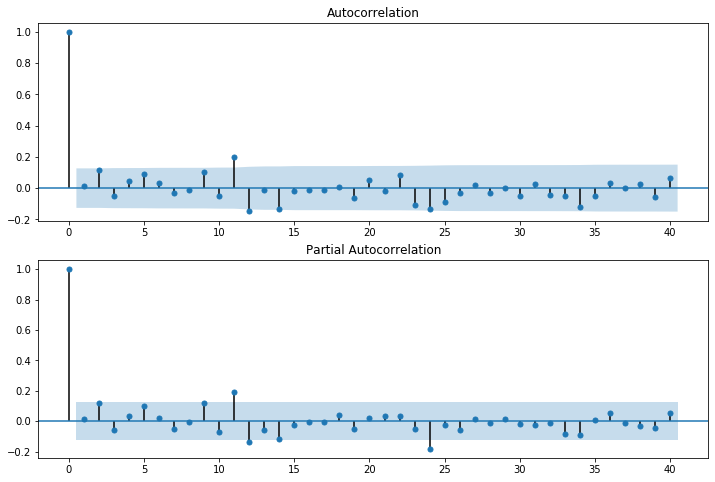

In [196]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

## Estimacion del modelo transformado

In [197]:
dy = y['y'].diff(periods=1)

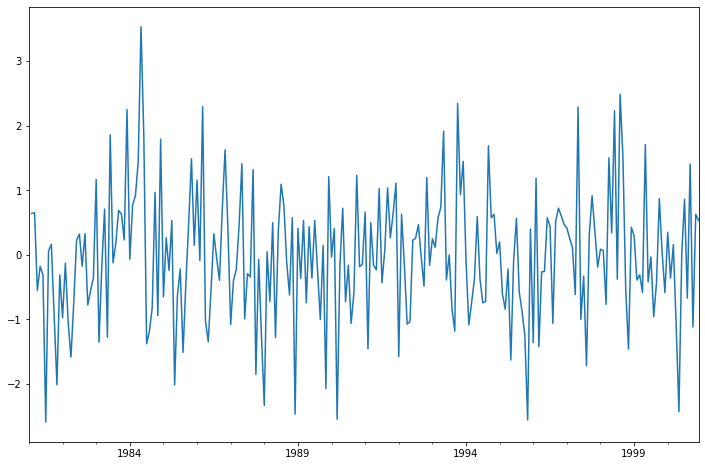

In [198]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax = dy.plot(ax=ax)

In [199]:
# Generar el modelo
model = sm.tsa.SARIMAX(y, order=(1,1,0), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -339.993
Date:                Tue, 23 Jun 2020   AIC                            683.987
Time:                        15:32:42   BIC                            690.940
Sample:                    01-31-1981   HQIC                           686.789
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0145      0.066      0.219      0.827      -0.115       0.144
sigma2         1.0073      0.084     12.036      0.000       0.843       1.171
Ljung-Box (Q):                       55.38   Jarque-

In [200]:
resid1 = results.resid

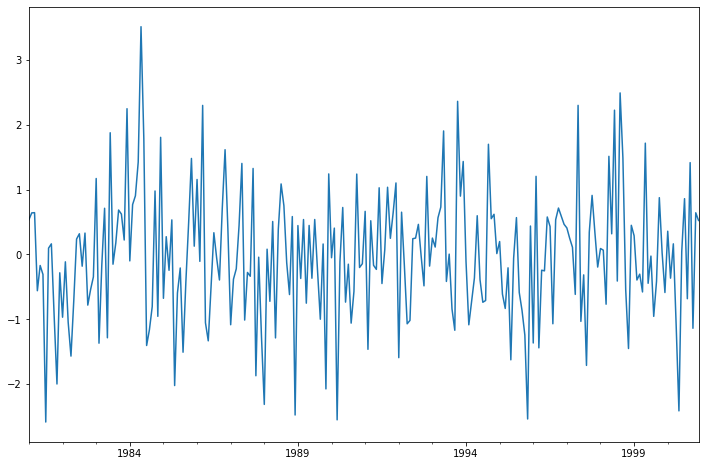

In [201]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax = resid1.plot(ax=ax)

# Caminata aleatoria con trend y drift

Consideramos el modelo $y_t = \beta_0 + y_{t-1}+e_t$

## Generar la caminata aleatoria con trend y drift

In [208]:
arparams = np.array([1, -1])
maparams = np.array([1])

nobs = 240

y = arma_generate_sample(arparams, maparams, nobs)

In [209]:
df=pd.DataFrame(y, columns=['y'])
df.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

df['e']=df['y'].diff(periods=1)
df['const']=1.2
df['trend']=range(0,240)
df['trend']= df['trend']*0.25
df['ly']=df['y'].shift()
df['yf']=df['const']+df['trend']+df['e']+df['ly']

In [210]:
df.head()

,y,e,const,trend,ly,yf
1981-01,0.134654,NaN,1.2,0.00,NaN,NaN
1981-02,-0.426904,-0.561559,1.2,0.25,0.134654,1.023096
1981-03,0.262754,0.689658,1.2,0.50,-0.426904,1.962754
1981-04,0.026777,-0.235977,1.2,0.75,0.262754,1.976777
1981-05,0.828206,0.801429,1.2,1.00,0.026777,3.028206


In [212]:
z = df['yf'].dropna()

## Grafico ACF y PACF

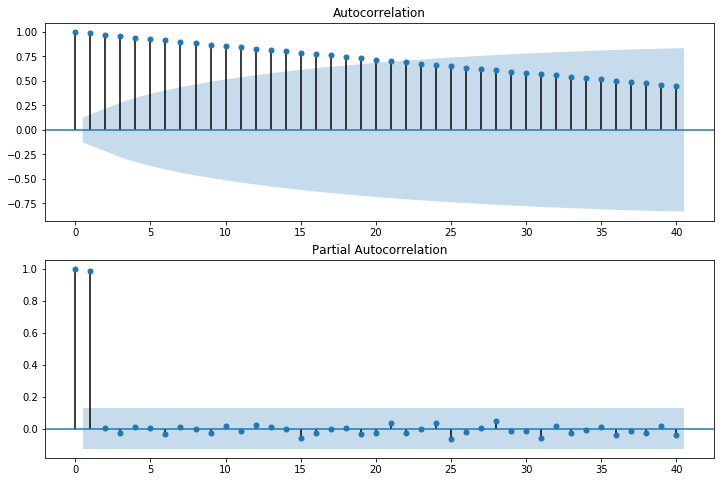

In [213]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(z, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(z, lags=40, ax=ax2)

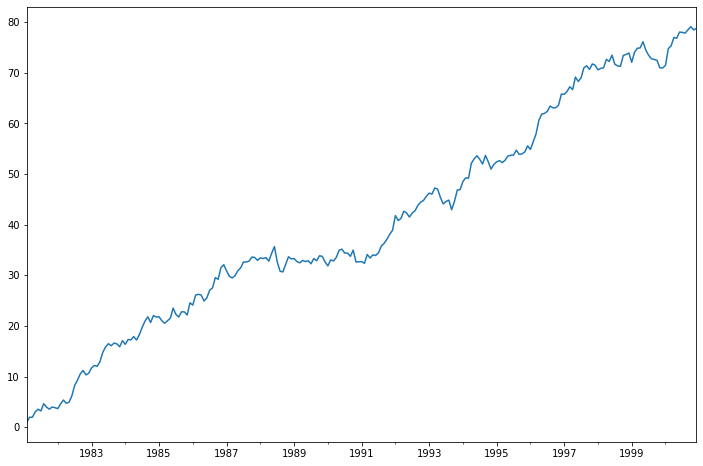

In [214]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax = z.plot(ax=ax)

## Extraer la tendencia de la serie

In [217]:
# Generar el modelo
model = sm.tsa.SARIMAX(z, order=(0,0,0), trend='ct')

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                     yf   No. Observations:                  239
Model:                        SARIMAX   Log Likelihood                -645.200
Date:                Tue, 23 Jun 2020   AIC                           1296.400
Time:                        15:36:00   BIC                           1306.830
Sample:                    02-28-1981   HQIC                          1300.603
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7766      0.576      6.552      0.000       2.647       4.906
drift          0.3086      0.004     74.479      0.000       0.300       0.317
sigma2        12.9497      1.645      7.874      0.0

In [219]:
# Serie sin tendencia
z_new = results.resid

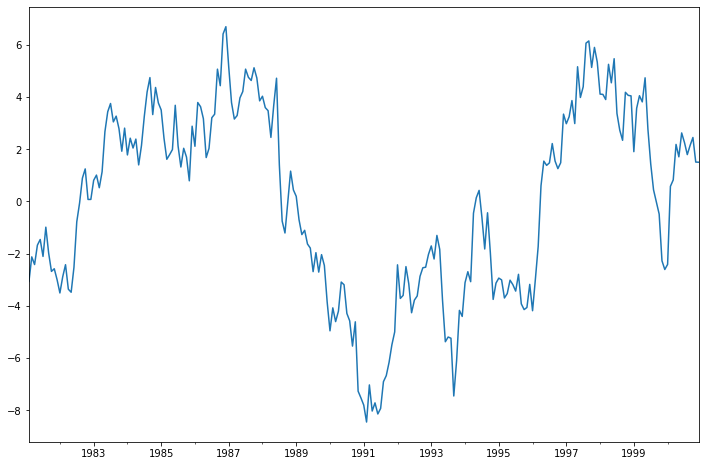

In [220]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

ax = z_new.plot(ax=ax)

## Estimar modelo sin tendencia

In [222]:
# Generar el modelo
model = sm.tsa.SARIMAX(z_new, order=(1,0,0), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  239
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -338.913
Date:                Tue, 23 Jun 2020   AIC                            681.826
Time:                        15:38:12   BIC                            688.779
Sample:                    02-28-1981   HQIC                           684.628
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9591      0.018     53.315      0.000       0.924       0.994
sigma2         0.9877      0.085     11.658      0.000       0.822       1.154
Ljung-Box (Q):                       37.66   Jarque-

## Analisis de residuos

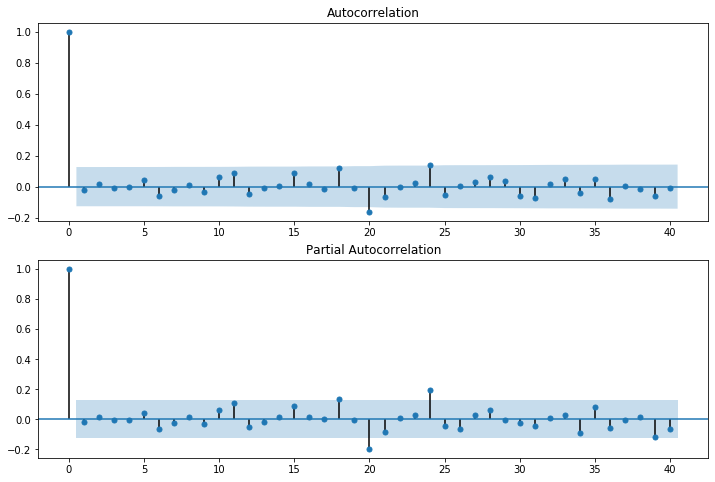

In [223]:
res2 = results.resid

fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(res2, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(res2, lags=40, ax=ax2)

# Ejemplo

In [2]:
# Importar data
df1 = pd.read_csv(r'CTASTRIM110.csv',header=0, parse_dates=True,squeeze=True)
df1.index = pd.period_range('2000Q1', '2019Q4', freq='Q')

In [3]:
# Definir varibles
dpib = df1['pib'].diff(periods=1)
pib = df1['pib']

Text(0, 0.5, 'Miles de US dólares, 2007=100')

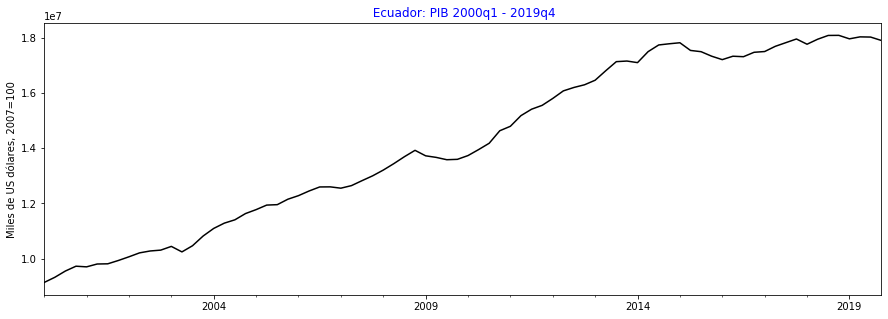

In [4]:
pib.plot(figsize=(15, 5),c='k')
plt.title(' Ecuador: PIB 2000q1 - 2019q4', c='b') 
plt.ylabel('Miles de US dólares, 2007=100') 


In [5]:
# Generar el modelo
model = sm.tsa.SARIMAX(pib, order=(1,1,0), trend='c')

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    pib   No. Observations:                   80
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1054.396
Date:                Tue, 23 Jun 2020   AIC                           2114.791
Time:                        13:31:01   BIC                           2121.899
Sample:                    03-31-2000   HQIC                          2117.639
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.843e+04   1.45e+04      4.711      0.000       4e+04    9.69e+04
ar.L1          0.0237      0.021      1.145      0.252      -0.017       0.064
sigma2      1.874e+10      0.011   1.65e+12      0.0